<a href="https://colab.research.google.com/github/lukaszek358/SDA/blob/main/projekt_ko%C5%84cowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
airports = pd.read_csv('airports.csv')

In [6]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
flights = pd.read_csv('/content/drive/MyDrive/flights.csv')
flights

<ipython-input-7-a879a2cb13d5>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('/content/drive/MyDrive/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged_flights = pd.merge(flights, airports, left_on= 'ORIGIN_AIRPORT', right_on = 'IATA_CODE')
merged_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
2,2015,1,1,4,DL,1560,N3743H,ANC,SEA,45,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
4,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [9]:
len(airports.IATA_CODE.unique())

322

In [10]:
len(merged_flights.DESTINATION_AIRPORT.unique())

322

In [11]:
raw_flights = merged_flights.rename(columns=str.lower)

In [12]:
raw_flights['date'] = pd.to_datetime(raw_flights[['year','month', 'day']], format='%Y-%m-%d')
first_column = raw_flights.pop('date')
raw_flights.insert(0, 'date', first_column)

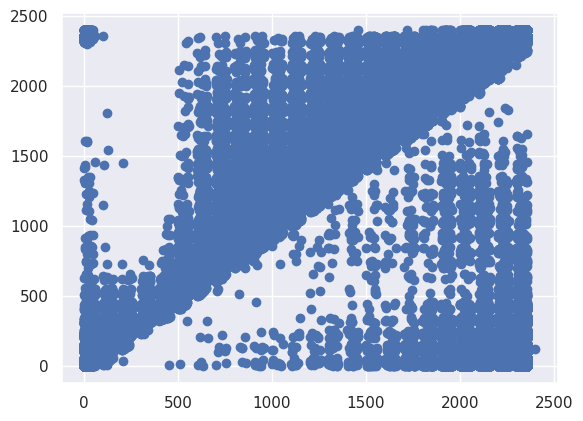

In [13]:
sns.set()
plt.scatter(x = raw_flights.scheduled_arrival, y = raw_flights.arrival_time)

In [14]:
raw_flights = raw_flights.drop(['year', 'flight_number', 'tail_number', 'taxi_in', 'wheels_on', 'elapsed_time', 'diverted', 'air_time', 'cancelled', 'cancellation_reason', 'air_system_delay','security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay', 'departure_time', 'arrival_time', 'iata_code', 'airport', 'city', 'state', 'country', 'latitude', 'longitude' ], axis=1)
raw_flights.head(10)

,date,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay
0,2015-01-01,1,1,4,AS,ANC,SEA,5,-11.0,21.0,15.0,205.0,1448,430,-22.0
1,2015-01-01,1,1,4,AS,ANC,SEA,45,-4.0,17.0,58.0,204.0,1448,509,-14.0
2,2015-01-01,1,1,4,DL,ANC,SEA,45,-14.0,25.0,56.0,210.0,1448,515,-24.0
3,2015-01-01,1,1,4,AS,ANC,PDX,50,-4.0,11.0,57.0,215.0,1542,525,-18.0
4,2015-01-01,1,1,4,AS,ANC,SEA,135,NaN,NaN,NaN,205.0,1448,600,NaN
5,2015-01-01,1,1,4,US,ANC,PHX,152,-9.0,21.0,204.0,323.0,2552,915,-10.0
6,2015-01-01,1,1,4,AS,ANC,SEA,155,-15.0,17.0,157.0,218.0,1448,633,-35.0
7,2015-01-01,1,1,4,AS,ANC,PDX,200,-10.0,24.0,214.0,210.0,1542,630,-11.0
8,2015-01-01,1,1,4,AS,ANC,SEA,220,-11.0,15.0,224.0,200.0,1448,640,-12.0
9,2015-01-01,1,1,4,AS,ANC,SEA,505,-8.0,16.0,513.0,205.0,1448,930,-14.0


In [15]:
raw_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332914 entries, 0 to 5332913
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   month                int64         
 2   day                  int64         
 3   day_of_week          int64         
 4   airline              object        
 5   origin_airport       object        
 6   destination_airport  object        
 7   scheduled_departure  int64         
 8   departure_delay      float64       
 9   taxi_out             float64       
 10  wheels_off           float64       
 11  scheduled_time       float64       
 12  distance             int64         
 13  scheduled_arrival    int64         
 14  arrival_delay        float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(3)
memory usage: 651.0+ MB


In [16]:
from datetime import datetime

In [17]:
def zamien_na_godziny_i_minuty(x):
    if x == 2359:
        return '23:59'
    elif x == 2400:
        return '00:00'

    else:
        x = str(x).zfill(4)
        return x[:2] + ':' + x[2:]

In [18]:
raw_flights['scheduled_departure'] = raw_flights['scheduled_departure'].apply(zamien_na_godziny_i_minuty)
raw_flights['scheduled_departure'] = pd.to_datetime(raw_flights['scheduled_departure']).dt.minute + pd.to_datetime(raw_flights['scheduled_departure']).dt.hour * 60
raw_flights['scheduled_departure']

0            5
1           45
2           45
3           50
4           95
          ... 
5332909    789
5332910    789
5332911    789
5332912    789
5332913    823
Name: scheduled_departure, Length: 5332914, dtype: int64

In [19]:
raw_flights['scheduled_arrival'] = raw_flights['scheduled_arrival'].apply(zamien_na_godziny_i_minuty)
raw_flights['scheduled_arrival'] = pd.to_datetime(raw_flights['scheduled_arrival']).dt.minute + pd.to_datetime(raw_flights['scheduled_arrival']).dt.hour * 60
raw_flights['scheduled_arrival']

0          270
1          309
2          315
3          325
4          360
          ... 
5332909    861
5332910    861
5332911    861
5332912    861
5332913    893
Name: scheduled_arrival, Length: 5332914, dtype: int64

In [20]:
raw_flights['arrival_delay'] = raw_flights['arrival_delay'].fillna(0)

In [21]:
raw_flights['departure_delay'] = raw_flights['departure_delay'].fillna(0)

In [22]:
raw_flights['taxi_out'] = raw_flights['taxi_out'].fillna(raw_flights['taxi_out'].mean())

In [23]:
raw_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332914 entries, 0 to 5332913
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   month                int64         
 2   day                  int64         
 3   day_of_week          int64         
 4   airline              object        
 5   origin_airport       object        
 6   destination_airport  object        
 7   scheduled_departure  int64         
 8   departure_delay      float64       
 9   taxi_out             float64       
 10  wheels_off           float64       
 11  scheduled_time       float64       
 12  distance             int64         
 13  scheduled_arrival    int64         
 14  arrival_delay        float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(3)
memory usage: 651.0+ MB


In [24]:
raw_flights.isnull().sum()

date                       0
month                      0
day                        0
day_of_week                0
airline                    0
origin_airport             0
destination_airport        0
scheduled_departure        0
departure_delay            0
taxi_out                   0
wheels_off             86612
scheduled_time             6
distance                   0
scheduled_arrival          0
arrival_delay              0
dtype: int64

In [25]:
raw_flights = raw_flights.dropna(axis = 0)

In [26]:
raw_flights = raw_flights.reset_index(drop = True)

In [27]:
raw_flights

,date,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay
0,2015-01-01,1,1,4,AS,ANC,SEA,5,-11.0,21.0,15.0,205.0,1448,270,-22.0
1,2015-01-01,1,1,4,AS,ANC,SEA,45,-4.0,17.0,58.0,204.0,1448,309,-14.0
2,2015-01-01,1,1,4,DL,ANC,SEA,45,-14.0,25.0,56.0,210.0,1448,315,-24.0
3,2015-01-01,1,1,4,AS,ANC,PDX,50,-4.0,11.0,57.0,215.0,1542,325,-18.0
4,2015-01-01,1,1,4,US,ANC,PHX,112,-9.0,21.0,204.0,323.0,2552,555,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246291,2015-09-04,9,4,5,B6,HYA,JFK,789,16.0,6.0,1331.0,72.0,196,861,-9.0
5246292,2015-09-05,9,5,6,B6,HYA,JFK,789,-11.0,10.0,1308.0,72.0,196,861,-28.0
5246293,2015-09-06,9,6,7,B6,HYA,JFK,789,0.0,11.0,1320.0,72.0,196,861,-20.0
5246294,2015-09-07,9,7,1,B6,HYA,JFK,789,-13.0,11.0,1307.0,72.0,196,861,-27.0


In [28]:
raw_flights['scheduled_departure_norm'] = 2 * math.pi * raw_flights['scheduled_departure'] / 1440
raw_flights["cos_scheduled_departure_norm"] = np.cos(raw_flights['scheduled_departure_norm'])

In [29]:
raw_flights['day_of_week_norm'] = 2 * math.pi * raw_flights['day_of_week'] / raw_flights.day_of_week.max()
raw_flights["cos_day_of_week_norm"] = np.cos(raw_flights['day_of_week_norm'])

In [30]:
raw_flights['scheduled_arrival_norm'] = 2 * math.pi * raw_flights['scheduled_arrival'] / 1440
raw_flights['cos_scheduled_arrival_norm'] = np.cos(raw_flights['scheduled_arrival_norm'])

In [31]:
raw_flights = raw_flights.drop(columns = ['scheduled_arrival'])

In [32]:
raw_flights['month_norm'] = 2 * math.pi * raw_flights['month'] / raw_flights.month.max()
raw_flights['cos_month_norm'] = np.cos(raw_flights['month_norm'])

In [33]:
# raw_flights['wheels_off'] = raw_flights['wheels_off'].apply(zamien_na_godziny_i_minuty)
# raw_flights['wheels_off'] = raw_flights['wheels_off'].str.split(':').str[0]
# raw_flights['wheels_off']

In [34]:
# raw_flights.to_csv('raw_flights.csv')

In [35]:
# sns.boxplot(data = raw_flights, y = 'arrival_delay', x='day_of_week', showfliers=False)

<Axes: xlabel='airline', ylabel='arrival_delay'>

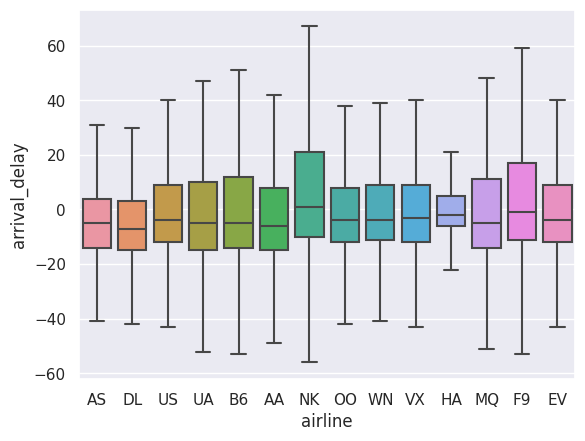

In [36]:
sns.boxplot(data = raw_flights, y = 'arrival_delay', x='airline', showfliers=False)

<Axes: xlabel='month', ylabel='arrival_delay'>

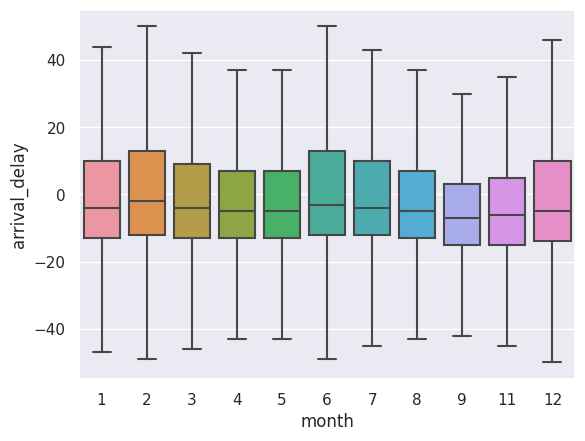

In [37]:
sns.boxplot(data = raw_flights, y = 'arrival_delay', x='month', showfliers=False) #showfliers - wyrzucamy 

In [38]:
raw_flights = raw_flights.drop(columns =['month','day', 'day_of_week'])

In [39]:
raw_flights

,date,airline,origin_airport,destination_airport,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,arrival_delay,scheduled_departure_norm,cos_scheduled_departure_norm,day_of_week_norm,cos_day_of_week_norm,scheduled_arrival_norm,cos_scheduled_arrival_norm,month_norm,cos_month_norm
0,2015-01-01,AS,ANC,SEA,5,-11.0,21.0,15.0,205.0,1448,-22.0,0.021817,0.999762,3.590392,-0.900969,1.178097,0.382683,0.523599,8.660254e-01
1,2015-01-01,AS,ANC,SEA,45,-4.0,17.0,58.0,204.0,1448,-14.0,0.196350,0.980785,3.590392,-0.900969,1.348267,0.220697,0.523599,8.660254e-01
2,2015-01-01,DL,ANC,SEA,45,-14.0,25.0,56.0,210.0,1448,-24.0,0.196350,0.980785,3.590392,-0.900969,1.374447,0.195090,0.523599,8.660254e-01
3,2015-01-01,AS,ANC,PDX,50,-4.0,11.0,57.0,215.0,1542,-18.0,0.218166,0.976296,3.590392,-0.900969,1.418080,0.152123,0.523599,8.660254e-01
4,2015-01-01,US,ANC,PHX,112,-9.0,21.0,204.0,323.0,2552,-10.0,0.488692,0.882948,3.590392,-0.900969,2.421644,-0.751840,0.523599,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246291,2015-09-04,B6,HYA,JFK,789,16.0,6.0,1331.0,72.0,196,-9.0,3.442662,-0.955020,4.487990,-0.222521,3.756821,-0.816642,4.712389,-1.836970e-16
5246292,2015-09-05,B6,HYA,JFK,789,-11.0,10.0,1308.0,72.0,196,-28.0,3.442662,-0.955020,5.385587,0.623490,3.756821,-0.816642,4.712389,-1.836970e-16
5246293,2015-09-06,B6,HYA,JFK,789,0.0,11.0,1320.0,72.0,196,-20.0,3.442662,-0.955020,6.283185,1.000000,3.756821,-0.816642,4.712389,-1.836970e-16
5246294,2015-09-07,B6,HYA,JFK,789,-13.0,11.0,1307.0,72.0,196,-27.0,3.442662,-0.955020,0.897598,0.623490,3.756821,-0.816642,4.712389,-1.836970e-16


One Hot Encoding

In [40]:
airline_cat = raw_flights[['airline']]
airline_cat.head(20)

,airline
0,AS
1,AS
2,DL
3,AS
4,US
5,AS
6,AS
7,AS
8,AS
9,DL


In [41]:
airline_cat = pd.get_dummies(data = airline_cat, drop_first = True)

In [42]:
airline_cat.head()

,airline_AS,airline_B6,airline_DL,airline_EV,airline_F9,airline_HA,airline_MQ,airline_NK,airline_OO,airline_UA,airline_US,airline_VX,airline_WN
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0


<ipython-input-47-1f3b4e49e5f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = raw_flights.corr()


<Axes: >

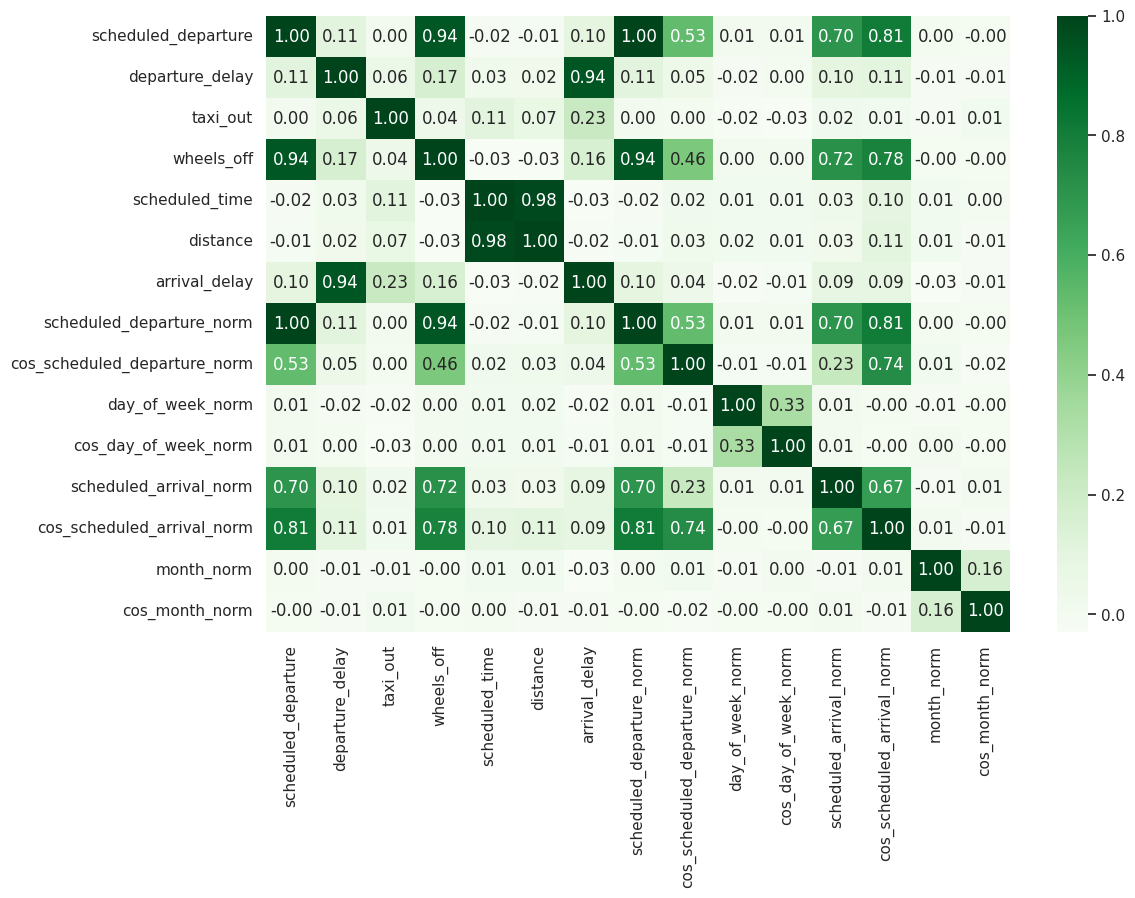

In [47]:
corr = raw_flights.corr()

f, ax = plt.subplots(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt= '.2f', cmap = 'Greens', )